In [1]:
import os
import pymysql
import pandas as pd

host = '127.0.0.1'
port = "3306"
user = 'root'
password = ''
database = 'news'

conn = pymysql.connect(
    host=host,
    port=int(port),
    user=user,
    passwd=password,
    db=database,
    charset='utf8mb4')

def run(sql):
    df = pd.read_sql_query(sql,conn)
    return df

Mengekstrak row yang hanya memuat keyword yang kita inginkan.

In [2]:
label1 = "Penyebab"
label0 = "Global Warming"
label2 = "Perubahan Iklim"
label3 = "Mitigasi"
label4 = "Penyakit"

# ganti keyword di sini
keyword1 = "volcanic eruptions", "volcanic eruption", "volcano eruption", "eruption", "volcano eruptions", "pollution", "deforestation", "greenhouse", "plastic waste", "ilegal logging", "carbon dioxide", "methane", "emission", "emissions" #sebab
keyword0 = "global warming" #masalah
keyword2 = "flood damage", "flood damages", "extreme drought", "climate change", "climate changes", "desertification", "extreme weather" #akibat
keyword3 = "alternative energy", "renewable energy", "energy efficiency", "greening", "reforestation", "greenpeace", "eco-", "waste reduction", "sustainability", "sustainable development", "sustainable developments", "renewable resource", "renewable resources", "kyoto protocol" #mitigasi

keyword4 = "epidemic", "endemic", "disease", "virus", "dengue fever", "mumps", "zika", "mosquito-borne", "contaminated water", "influenza" #penyakit

# gabungan keyword
keyword = tuple(j for i in (keyword0, keyword1, keyword2, keyword3, keyword4) for j in (i if isinstance(i, tuple) else (i,)))

if isinstance(keyword, str):
    query = "SELECT * FROM gdelt WHERE content LIKE '%%%s%%'" %keyword
else:
    query = "SELECT * FROM gdelt WHERE content LIKE '%%%s%%'" %(keyword[0])+" OR content LIKE '%%%s%%'"*(len(keyword)-1) %(keyword[1:])

master = run(query)
master

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL,title,content
0,768590206,20180701,201807,2018,2018.4959,THA,THAI,THA,None,None,...,"Bangkok, Krung Thep Mahanakhon, Thailand",TH,TH40,13.75,100.517,-3250083,20180701,http://www.pattayamail.com/thailandnews/thai-r...,"THAI resumes Bangkok-Bali flights, continues t...",Bangkok – Thai Airways International has resum...
1,768590854,20180701,201807,2018,2018.4959,None,None,None,None,None,...,"Washington, District of Columbia, United States",US,USDC,38.8951,-77.0364,531871,20180701,https://www.volcanodiscovery.com/kilauea/news/...,Kilauea volcano Volcanic Ash Advisory: ROCKFAL...,Kilauea is the youngest and most active Hawaii...
2,768591304,20180701,201807,2018,2018.4959,IDN,INDONESIA,IDN,None,None,...,"Washington, District of Columbia, United States",US,USDC,38.8951,-77.0364,531871,20180701,https://www.volcanodiscovery.com/kilauea/news/...,Kilauea volcano Volcanic Ash Advisory: ROCKFAL...,Kilauea is the youngest and most active Hawaii...
3,768591305,20180701,201807,2018,2018.4959,IDN,INDONESIA,IDN,None,None,...,"Washington, District of Columbia, United States",US,USDC,38.8951,-77.0364,531871,20180701,https://www.volcanodiscovery.com/kilauea/news/...,Kilauea volcano Volcanic Ash Advisory: ROCKFAL...,Kilauea is the youngest and most active Hawaii...
4,768591787,20180701,201807,2018,2018.4959,USA,UNITED STATES,USA,None,None,...,"Washington, District of Columbia, United States",US,USDC,38.8951,-77.0364,531871,20180701,https://www.volcanodiscovery.com/kilauea/news/...,Kilauea volcano Volcanic Ash Advisory: ROCKFAL...,Kilauea is the youngest and most active Hawaii...
5,768591789,20180701,201807,2018,2018.4959,USA,WASHINGTON,USA,None,None,...,"Washington, District of Columbia, United States",US,USDC,38.8951,-77.0364,531871,20180701,https://www.volcanodiscovery.com/kilauea/news/...,Kilauea volcano Volcanic Ash Advisory: ROCKFAL...,Kilauea is the youngest and most active Hawaii...
6,768591826,20180701,201807,2018,2018.4959,USA,WASHINGTON,USA,None,None,...,"Washington, District of Columbia, United States",US,USDC,38.8951,-77.0364,531871,20180701,https://www.volcanodiscovery.com/kilauea/news/...,Kilauea volcano Volcanic Ash Advisory: ROCKFAL...,Kilauea is the youngest and most active Hawaii...
7,768595790,20180701,201807,2018,2018.4959,None,None,None,None,None,...,"Sepang, Sumatera Barat, Indonesia",ID,ID24,0.0577,100.754,10121875,20180701,https://www.theonlinecitizen.com/2018/07/01/ma...,"Mahathir, Jokowi discuss possibility of a join...","Earlier on 28 June, Prime Minister Tun Dr Maha..."
8,768595791,20180701,201807,2018,2018.4959,None,None,None,None,None,...,"Jakarta, Jakarta Raya, Indonesia",ID,ID04,-6.17444,106.829,-2679652,20180701,https://www.theonlinecitizen.com/2018/07/01/ma...,"Mahathir, Jokowi discuss possibility of a join...","Earlier on 28 June, Prime Minister Tun Dr Maha..."
9,768595792,20180701,201807,2018,2018.4959,None,None,None,None,None,...,"Halim Perdanakusuma, Jakarta Raya, Indonesia",ID,ID04,-6.2647,106.894,10169008,20180701,https://www.theonlinecitizen.com/2018/07/01/ma...,"Mahathir, Jokowi discuss possibility of a join...","Earlier on 28 June, Prime Minister Tun Dr Maha..."


In [3]:
bulan = 7 #(masukkan dalam dua digit bulan yang anda pilih untuk teliti)
tahun = 2018

Menghitung row yang hanya memuat keyword yang kita inginkan.

In [4]:
for i in range(0,5):
    if eval("isinstance(keyword{0}, str)".format(i)):
        exec("query{0} = \"SELECT sqldate AS 'Tanggal Berita', count(distinct(content)) AS 'Jumlah Berita' FROM gdelt WHERE content LIKE '%%%s%%'\" %keyword{0} + \" GROUP BY sqldate\"".format(i))
    else:
        exec("query{0} = \"SELECT sqldate AS 'Tanggal Berita', count(distinct(content)) AS 'Jumlah Berita' FROM gdelt WHERE content LIKE '%%%s%%'\" %(keyword{0}[0]) + \" OR content LIKE '%%%s%%'\"*(len(keyword{0})-1) %(keyword{0}[1:]) + \" GROUP BY sqldate\"".format(i))
    exec("eksposur{0} = run(query{0})".format(i))

In [5]:
for i in range(0,5):
    exec("eksposur{0}['Tanggal Berita']=pd.to_datetime(eksposur{0}['Tanggal Berita'])".format(i))

In [6]:
for i in range(0,5):
    exec("xp{0} = pd.DataFrame([])".format(i))

for i in range(0,5):
    for j in eval("range(len(eksposur{0}))".format(i)):
        if eval("eksposur{0}.loc[{1}][0].month==bulan and eksposur{0}.loc[{1}][0].year==tahun".format(i,j)):
            exec("xp{0} = xp{0}.append(eksposur{0}.loc[{1}])".format(i,j))

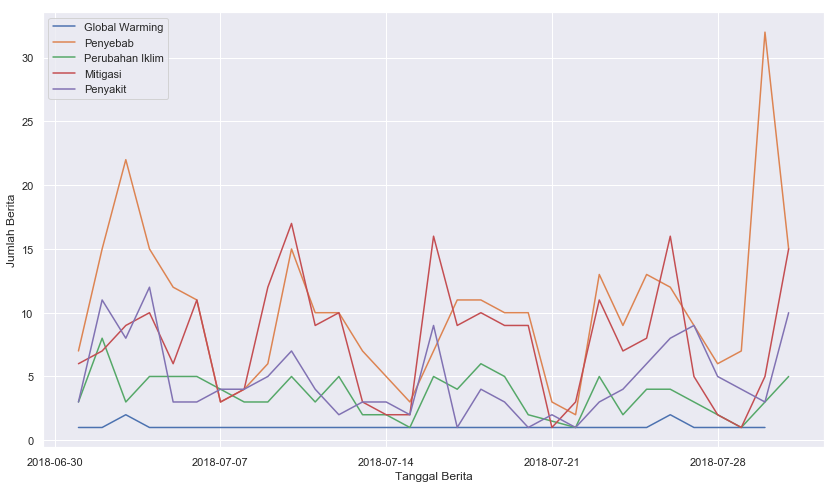

In [8]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,8))

for i in range(0,5):
    sns.lineplot(x="Tanggal Berita", y="Jumlah Berita", data=eval("xp{0}".format(i)), ax=ax, label=eval("label{0}".format(i)))
ax.legend()
plt.show()

In [9]:
eval("xp{0}".format(i))

,Jumlah Berita,Tanggal Berita
3,3.0,2018-07-01
4,11.0,2018-07-02
5,8.0,2018-07-03
6,12.0,2018-07-04
7,3.0,2018-07-05
8,3.0,2018-07-06
9,4.0,2018-07-07
10,4.0,2018-07-08
11,5.0,2018-07-09
12,7.0,2018-07-10


In [12]:
df = run("SELECT * FROM gdelt")
writer = pd.ExcelWriter('outputss.xlsx')

df.to_excel(writer, sheet_name='Sheet',startrow=0, startcol=0, header=False, index=False)
writer.save()

C:\Users\Asus\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:910: UserWarning: Ignoring URL 'http://tvtropes.org/Main/JungleWarfare

Advertisement:

So%20you%20have%20a%20Hungry%20Jungle.%20And%20then%20you%20have%20soldiers,%20guerillas,%20insurgents,%20etc.%20trekking%20through%20it.%20Suddenly,%20all%20hell%20breaks%20loose%20as%20two%20or%20more%20factions%20struggle%20against%20dwindling%20supplies,%20scarce%20food,%20the%20enemy%20at%20every%20corner,%20the%20elements,%20and%20of%20course,%20the%20jungle%20itself.%20Jungle%20Warfare%20is%20what%20it%20says,%20fighting%20that%20takes%20place%20in%20a%20remote%20jungle%20or%20lush%20tropical%20rainforest,%20usually%20on%20a%20remote%20island%20or%20somewhere%20far%20away%20from%20civilization.%20When%20there%20are%20civilians,%20they're%20usually%20confined%20to%20a%20small%20village,%20usually%20near%20a%20river.

In%20these%20kinds%20of%20situations,%20expect%20elite%20troops,%20usually%20those%20specialized%20or%20experienc